 # MODEL BUILDING

In [68]:
import pandas as pd
full_data = pd.read_csv('cleaned_aus_all.csv', index_col=[0])
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,ALBURY,13.4,22.9,0.6,6.276359,6.993570,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,5.147816,16.9,21.8,NO,NO
1,2008-12-02,ALBURY,7.4,25.1,0.0,6.265077,10.889165,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.896582,2.625009,17.2,24.3,NO,NO
2,2008-12-03,ALBURY,12.9,25.7,0.0,8.587671,11.812062,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,2.016092,2.000000,21.0,23.2,NO,NO
3,2008-12-04,ALBURY,9.2,28.0,0.0,6.833623,11.590975,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,1.175643,1.965050,18.1,26.5,NO,NO
4,2008-12-05,ALBURY,17.5,32.3,1.0,7.355749,5.494431,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,NO,NO


In [69]:
# Convert the values in 'RainToday' and 'RainTomorrow' columns
full_data['RainToday'] = full_data['RainToday'].replace({'YES': 'Yes', 'NO': 'No'})
full_data['RainTomorrow'] = full_data['RainTomorrow'].replace({'YES': 'Yes', 'NO': 'No'})

# Display the unique values in the 'RainToday' and 'RainTomorrow' columns after conversion
rain_today_unique = full_data['RainToday'].unique()
rain_tomorrow_unique = full_data['RainTomorrow'].unique()

full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data.head()

rain_today_unique, rain_tomorrow_unique

(array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object))

In [70]:
full_data['Date'] = pd.to_datetime(full_data['Date'])
full_data['year'] = full_data['Date'].dt.year
full_data['month'] = full_data['Date'].dt.month
full_data['day'] = full_data['Date'].dt.day
full_data.drop(['Date'], axis = 1,inplace=True) 
full_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,ALBURY,13.4,22.9,0.6,6.276359,6.993570,W,44.0,W,WNW,...,1007.1,8.000000,5.147816,16.9,21.8,0,0,2008,12,1
1,ALBURY,7.4,25.1,0.0,6.265077,10.889165,WNW,44.0,NNW,WSW,...,1007.8,1.896582,2.625009,17.2,24.3,0,0,2008,12,2
2,ALBURY,12.9,25.7,0.0,8.587671,11.812062,WSW,46.0,W,WSW,...,1008.7,2.016092,2.000000,21.0,23.2,0,0,2008,12,3
3,ALBURY,9.2,28.0,0.0,6.833623,11.590975,NE,24.0,SE,E,...,1012.8,1.175643,1.965050,18.1,26.5,0,0,2008,12,4
4,ALBURY,17.5,32.3,1.0,7.355749,5.494431,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


In [71]:
full_data.shape

(145460, 25)

In [72]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-null  fl

,Unnamed: 0,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,ALBURY,13.4,22.9,0.6,6.276359,6.993570,W,44.0,W,...,1007.1,8.000000,5.147816,16.9,21.8,0,0,2008,12,1
1,1,ALBURY,7.4,25.1,0.0,6.265077,10.889165,WNW,44.0,NNW,...,1007.8,1.896582,2.625009,17.2,24.3,0,0,2008,12,2
2,2,ALBURY,12.9,25.7,0.0,8.587671,11.812062,WSW,46.0,W,...,1008.7,2.016092,2.000000,21.0,23.2,0,0,2008,12,3
3,3,ALBURY,9.2,28.0,0.0,6.833623,11.590975,NE,24.0,SE,...,1012.8,1.175643,1.965050,18.1,26.5,0,0,2008,12,4
4,4,ALBURY,17.5,32.3,1.0,7.355749,5.494431,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


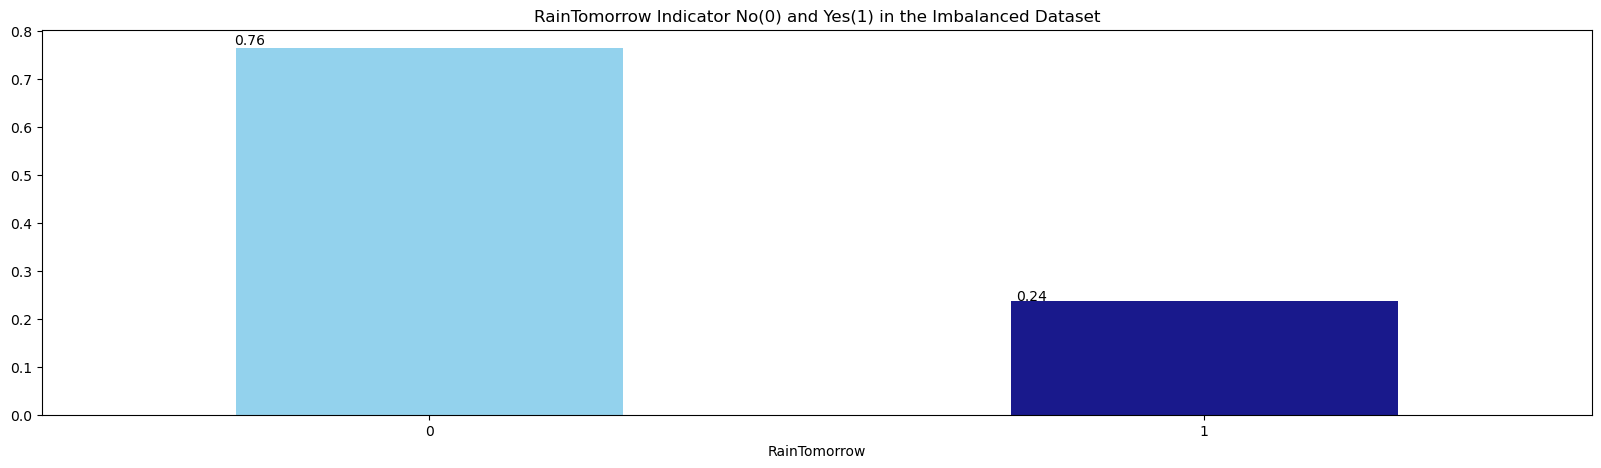

In [73]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,5))
ax=full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

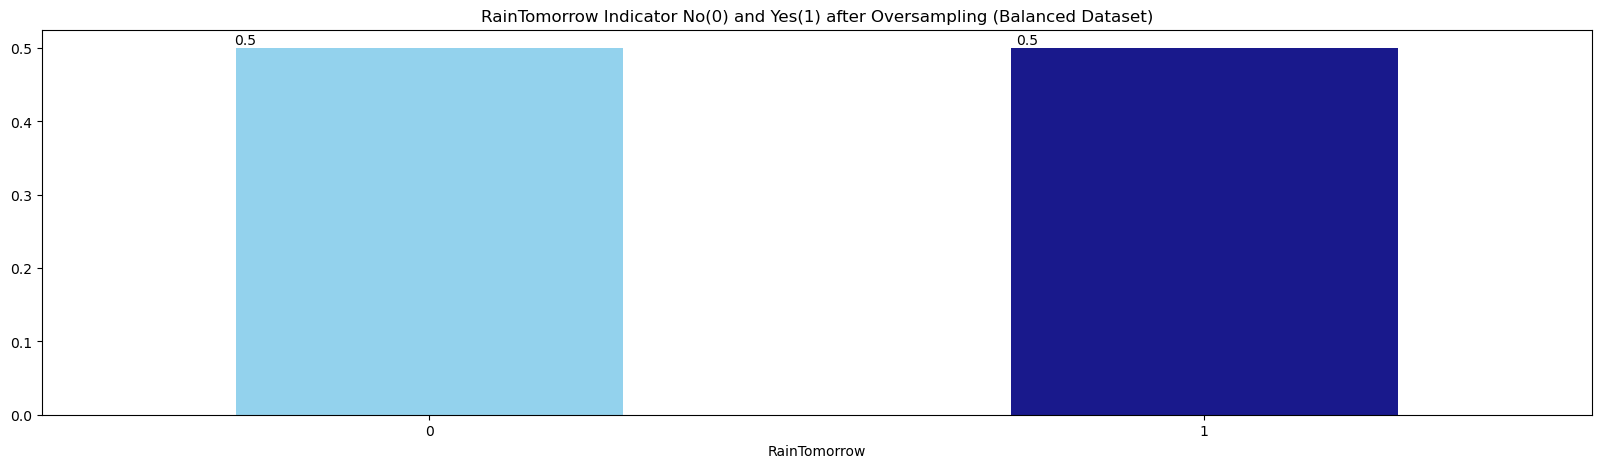

In [74]:
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (20,5))
ax=oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

In [75]:
# # Missing Data Pattern in Training Data
# import seaborn as sns
# plt.figure(figsize = (20,5))
# sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')
# plt.show()

In [76]:
# total = oversampled.isnull().sum().sort_values(ascending=False)
# percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
# missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing.head()

In [77]:
# oversampled.select_dtypes(include=['object']).columns

In [78]:
# # Impute categorical var with Mode
# oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
# oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
# oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
# oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [79]:
# # Convert categorical features to continuous features with Label Encoding
# from sklearn.preprocessing import LabelEncoder
# lencoders = {}
# for col in oversampled.select_dtypes(include=['object']).columns:
#     lencoders[col] = LabelEncoder()
#     oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [80]:
# import warnings
# warnings.filterwarnings("ignore")
# # Multiple Imputation by Chained Equations
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# MiceImputed = oversampled.copy(deep=True) 
# mice_imputer = IterativeImputer()
# MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [81]:
# # Detecting outliers with IQR
# Q1 = MiceImputed.quantile(0.25)
# Q3 = MiceImputed.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [82]:
# # Removing outliers from the dataset
# MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
# MiceImputed.shape

In [83]:
# MiceImputed.tail(5)

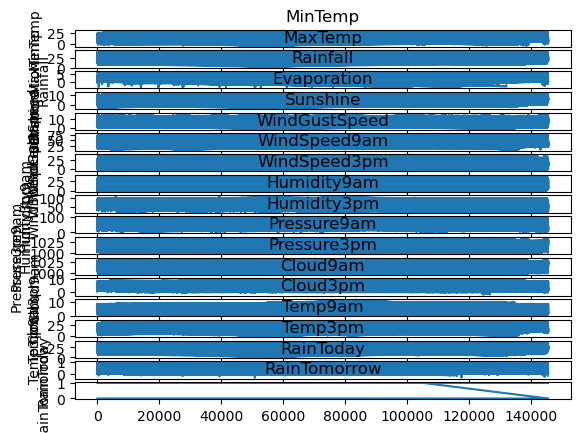

In [84]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (you can customize this based on your dataset)
categorical_columns = full_data.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    full_data[column] = label_encoder.fit_transform(full_data[column])

In [85]:
full_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2,13.4,22.9,0.6,6.276359,6.993570,13,44.0,13,14,...,1007.1,8.000000,5.147816,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,6.265077,10.889165,14,44.0,6,15,...,1007.8,1.896582,2.625009,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,8.587671,11.812062,15,46.0,13,15,...,1008.7,2.016092,2.000000,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,6.833623,11.590975,4,24.0,9,0,...,1012.8,1.175643,1.965050,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,7.355749,5.494431,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


In [86]:
MiceImputed = full_data.copy()

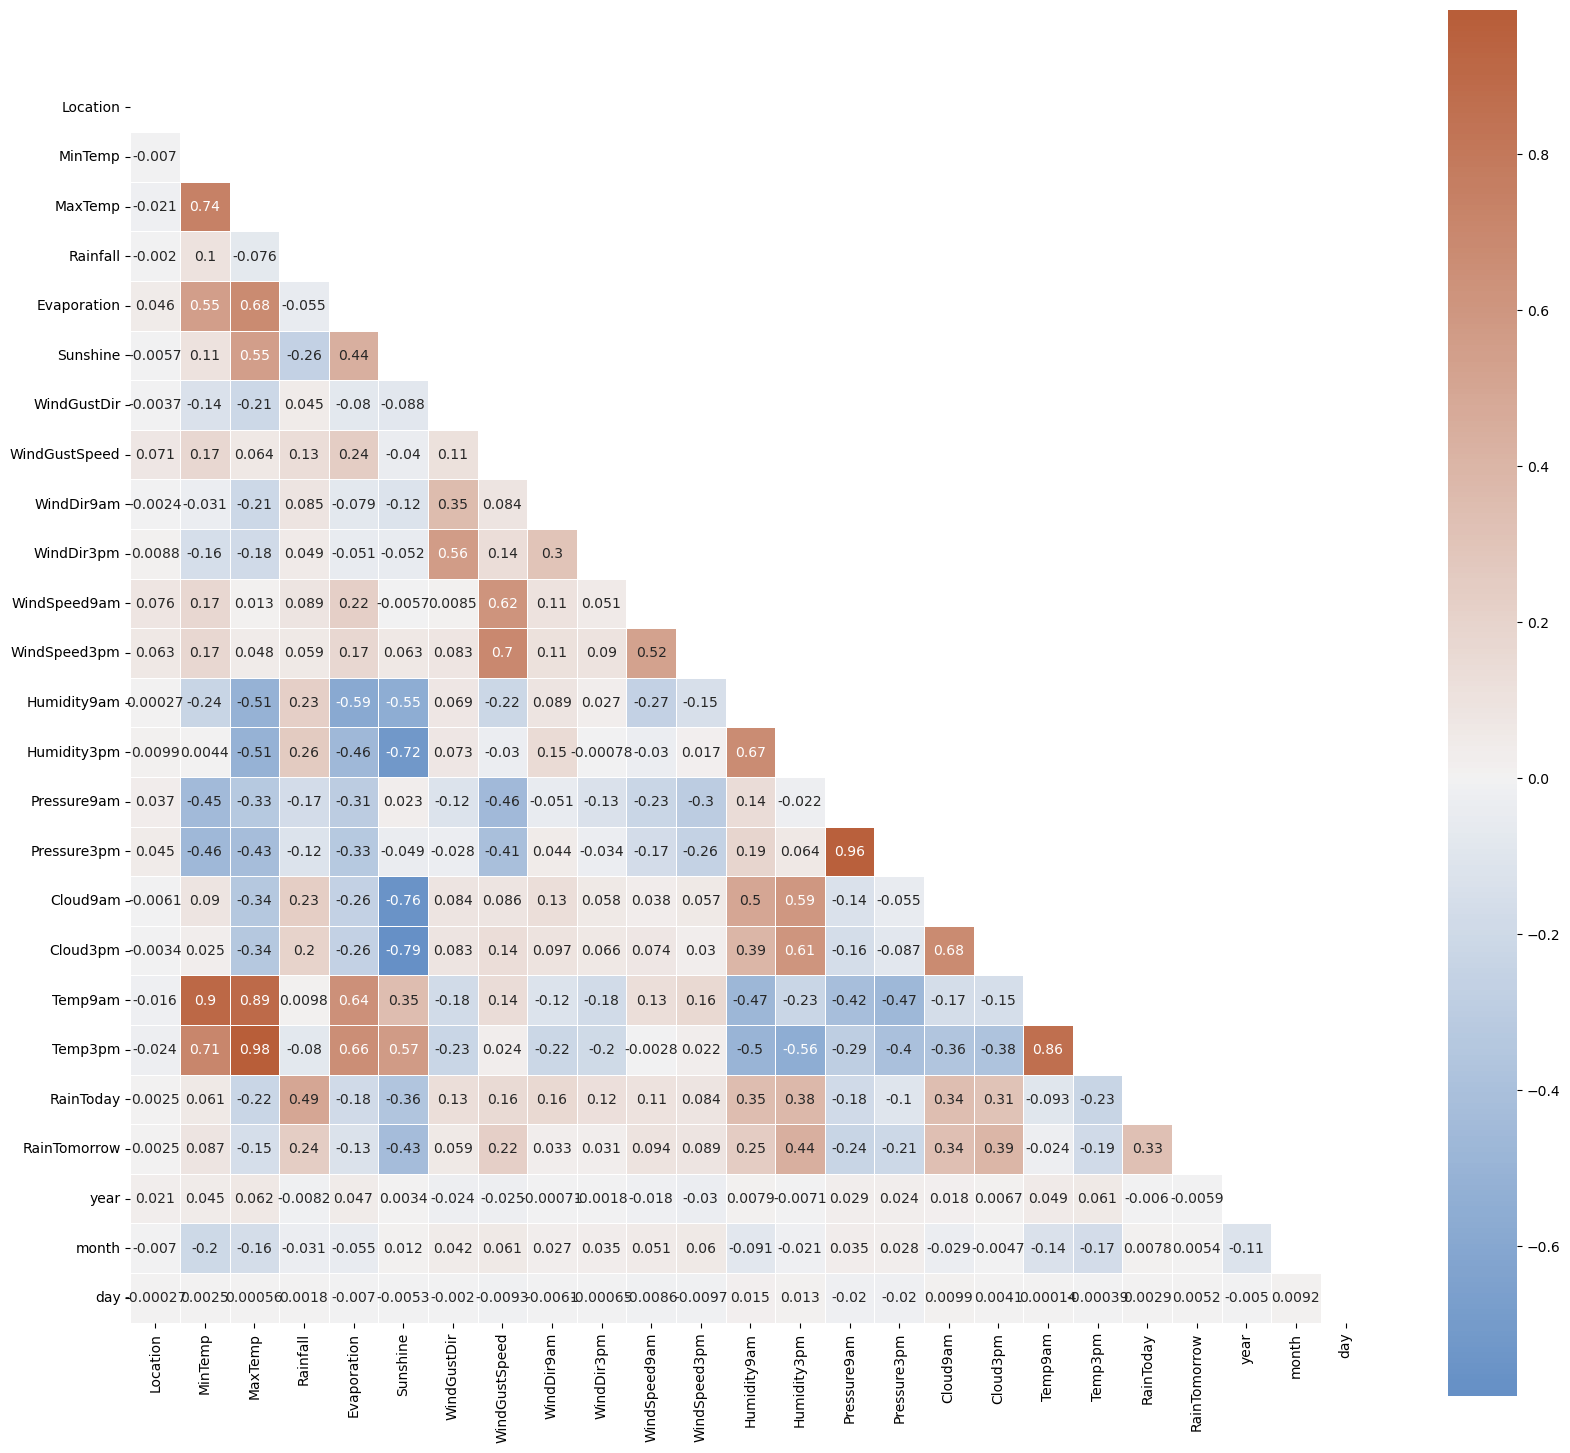

In [87]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

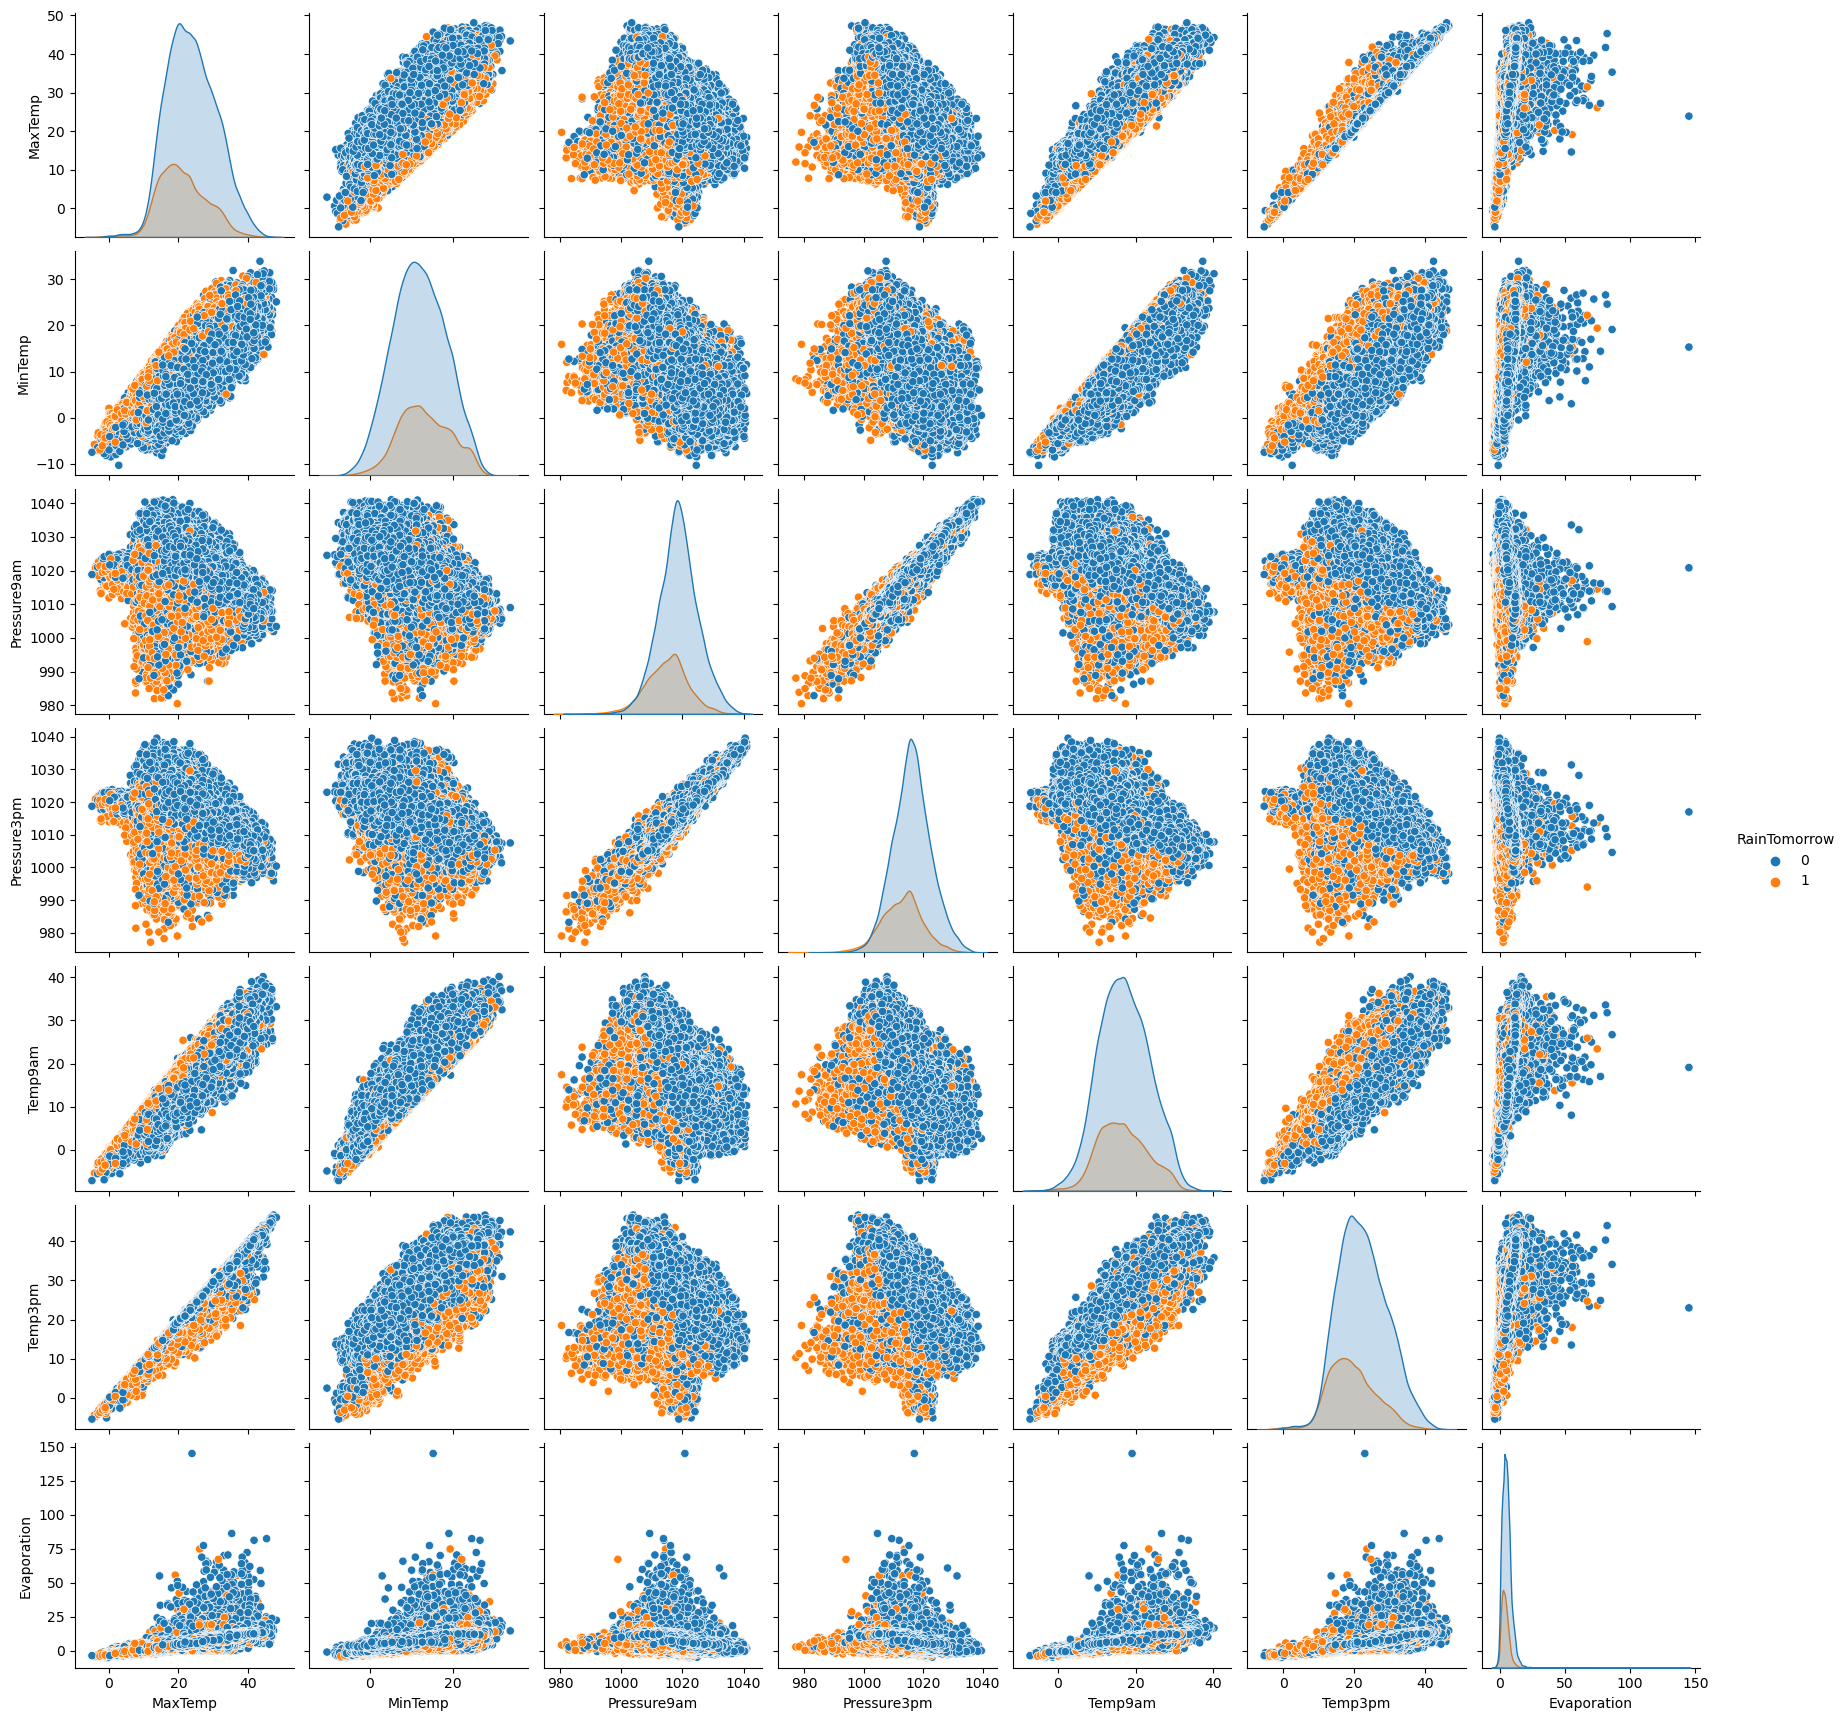

In [88]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm','Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )
plt.show()

# sns.pairplot( data=MiceImputed, vars=(), hue='RainTomorrow' )
# plt.show()

In [89]:
# Assuming you already have 'year', 'month', and 'day' columns in your DataFrame MiceImputed

# Function to encode datetime into cyclic parameters.
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
    return data

# Encoding 'month' column
MiceImputed['month_sin'] = np.sin(2 * np.pi * MiceImputed['month'] / 12)
MiceImputed['month_cos'] = np.cos(2 * np.pi * MiceImputed['month'] / 12)

# Encoding 'day' column
MiceImputed['day_sin'] = np.sin(2 * np.pi * MiceImputed['day'] / 31)
MiceImputed['day_cos'] = np.cos(2 * np.pi * MiceImputed['day'] / 31)

MiceImputed.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp3pm,RainToday,RainTomorrow,year,month,day,month_sin,month_cos,day_sin,day_cos
0,2,13.4,22.9,0.6,6.276359,6.993570,13,44.0,13,14,...,21.8,0,0,2008,12,1,-2.449294e-16,1.0,0.201299,0.979530
1,2,7.4,25.1,0.0,6.265077,10.889165,14,44.0,6,15,...,24.3,0,0,2008,12,2,-2.449294e-16,1.0,0.394356,0.918958
2,2,12.9,25.7,0.0,8.587671,11.812062,15,46.0,13,15,...,23.2,0,0,2008,12,3,-2.449294e-16,1.0,0.571268,0.820763
3,2,9.2,28.0,0.0,6.833623,11.590975,4,24.0,9,0,...,26.5,0,0,2008,12,4,-2.449294e-16,1.0,0.724793,0.688967
4,2,17.5,32.3,1.0,7.355749,5.494431,13,41.0,1,7,...,29.7,0,0,2008,12,5,-2.449294e-16,1.0,0.848644,0.528964


In [90]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [91]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'],
      dtype='object')


In [92]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.02679546 0.03311348 0.0312973  0.05111135 0.03210766 0.0877393
 0.02092164 0.04514119 0.02197148 0.02172626 0.0230558  0.02531635
 0.03489748 0.12541114 0.04594785 0.05206886 0.04009696 0.06595418
 0.03240876 0.03351357 0.02374411 0.01874288 0.01479469 0.02243714
 0.01322919 0.0131932  0.02356514 0.01969757]


In [93]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday','day']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [94]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [95]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, roc_auc_score, cohen_kappa_score,
                             confusion_matrix, ConfusionMatrixDisplay, 
                             roc_curve, classification_report)

def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    
    if not verbose:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
        
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    
    time_taken = time.time() - t0
    
    print(f"Accuracy = {accuracy}")
    print(f"ROC Area under Curve = {roc_auc}")
    print(f"Cohen's Kappa = {coh_kap}")
    print(f"Time taken = {time_taken}")
    
    print(classification_report(y_test, y_pred, digits=5))
    
    # Plot ROC curve
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, _ = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)
    
    # Compute and plot normalized confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ConfusionMatrixDisplay(cm_normalized, display_labels=model.classes_).plot(cmap=plt.cm.Blues)
    
    return model, accuracy, roc_auc, coh_kap, time_taken


Accuracy = 0.8333218754296714
ROC Area under Curve = 0.7174202253214261
Cohen's Kappa = 0.4849506256618157
Time taken = 1.3177120685577393
              precision    recall  f1-score   support

           0    0.85775   0.93717   0.89570     22218
           1    0.71019   0.49767   0.58524      6874

    accuracy                        0.83332     29092
   macro avg    0.78397   0.71742   0.74047     29092
weighted avg    0.82289   0.83332   0.82235     29092



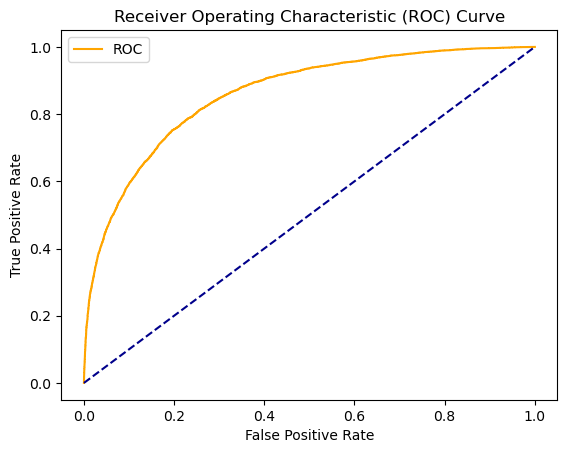

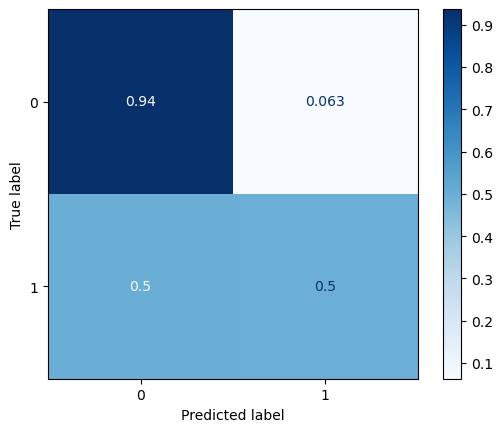

In [96]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.7896328887666713
ROC Area under Curve = 0.6955988236542947
Cohen's Kappa = 0.4016075255004814
Time taken = 0.449113130569458
              precision    recall  f1-score   support

           0    0.85405   0.87389   0.86385     22218
           1    0.55930   0.51731   0.53748      6874

    accuracy                        0.78963     29092
   macro avg    0.70667   0.69560   0.70067     29092
weighted avg    0.78440   0.78963   0.78674     29092



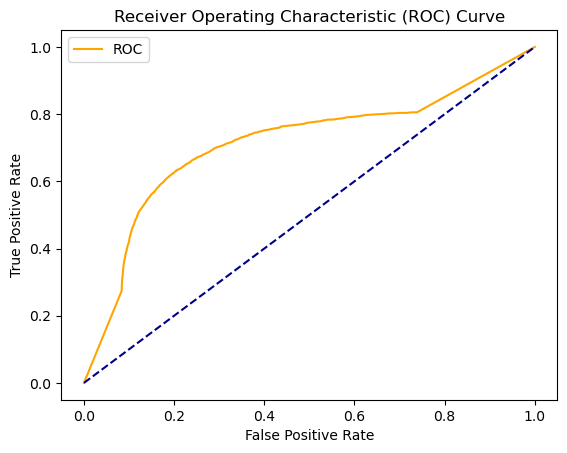

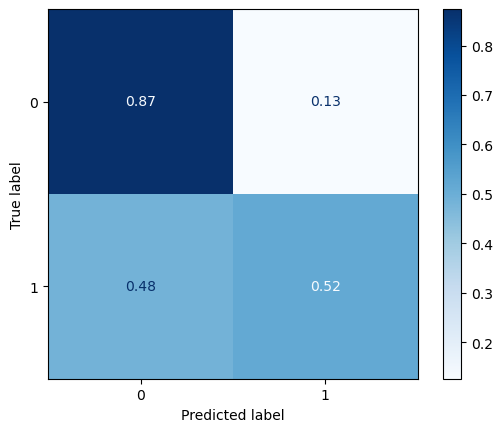

In [97]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)



In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [ ]:
# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)


In [ ]:
# Catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)


In [ ]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.80
width = 0.90

clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42) 
clf3 = MLPClassifier(random_state=42, verbose = 0)
clf4 = RandomForestClassifier(random_state=42)
clf5 = lgb.LGBMClassifier(random_state=42, verbose = 0)
clf6 = cb.CatBoostClassifier(random_state=42, verbose = 0)
clf7 = xgb.XGBClassifier(random_state=42)
eclf = EnsembleVoteClassifier(clfs=[clf4, clf5, clf6, clf7], weights=[1, 1, 1, 1], voting='soft')

X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'LightGBM',
          'CatBoost',
          'XGBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value}, 
                                filler_feature_ranges={2: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

In [ ]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.grid()
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [ ]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.grid()
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

In [ ]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
# import xgboost as xgb
# import catboost as cb
# from sklearn.neural_network import MLPClassifier
# from sklearn.ensemble import RandomForestClassifier

# # Initialize your previously trained models with their parameters
# params_xgb = {'n_estimators': 500, 'max_depth': 16}
# model_xgb = xgb.XGBClassifier(**params_xgb)

# params_cb = {'iterations': 50, 'max_depth': 16}
# model_cb = cb.CatBoostClassifier(**params_cb)

# params_nn = {'hidden_layer_sizes': (30,30,30), 'activation': 'logistic', 'solver': 'lbfgs', 'max_iter': 500}
# model_nn = MLPClassifier(**params_nn)

# params_rf = {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
# model_rf = RandomForestClassifier(**params_rf)

# # Fit each model on the training data
# model_xgb.fit(X_train, y_train)
# model_cb.fit(X_train, y_train)
# model_nn.fit(X_train, y_train)
# model_rf.fit(X_train, y_train)

# # Create an ensemble of the models using soft voting
# ensemble_model = VotingClassifier(estimators=[
#         ('xgb', model_xgb),
#         ('cb', model_cb),
#         ('nn', model_nn),
#         ('rf', model_rf)],
#         voting='soft')

# # Fit ensemble model on training data
# ensemble_model.fit(X_train, y_train)

# # Evaluate ensemble model on test data
# y_pred_ensemble = ensemble_model.predict(X_test)
# ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
# ensemble_roc_auc = roc_auc_score(y_test, y_pred_ensemble)
# ensemble_coh_kap = cohen_kappa_score(y_test, y_pred_ensemble)

# print(f"Ensemble Model Accuracy: {ensemble_accuracy}")
# print(f"Ensemble Model ROC AUC: {ensemble_roc_auc}")
# print(f"Ensemble Model Cohen's Kappa: {ensemble_coh_kap}")

# # You can now compare these metrics with those of the individual models to evaluate the performance


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Evaluate ensemble model on test data to get predicted probabilities
y_pred_probs_ensemble = ensemble_model.predict_proba(X_test)[:, 1]  # probabilities for the positive outcome

# Compute ROC curve and ROC area for the ensemble model
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_probs_ensemble)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plot ROC curve
plt.figure()
lw = 2  # line width
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange',
         lw=lw, label=f'Ensemble ROC curve (area = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# ensemble_model

In [ ]:
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# print(f"Ensemble model accuracy: {accuracy_ensemble:.2f}")